In [1]:
from SpectrumAnalysis.SpectrumAnalysis import SpectrumAnalysis
project_data_filename = 'InSb_project.fits'
analyzer = SpectrumAnalysis(metadata_filename = project_data_filename)

1. Author of this metadata: 
2. Date of writing this data analysis: 
3. Brief description of this project: 


Press the index number to choose the file to read into the hdu
Press 's' to skip the addition of HDU
Press 'e' to end the addition of HDU
Press 'n' to go to the next zip file
Press 'p' to go to the previous zip file
------------------------------
Please select the FITS file to add as HDU 'REF1' (press 'h' for help):
Available files:
0: Background_Noise.fits
1: Polarizer_35deg_THz_pulse_Aperture.fits
2: THz_pulse_Aperture.fits
Go to previous zip file.
------------------------------
Please select the FITS file to add as HDU 'REF1' (press 'h' for help):
Available files:
0: Polarizer_35deg_THz_pulse_Aperture.fits
1: testPolarizer_35deg_THz_pulse_Aperture.fits
You selected: preprocessed_data\Polarizer_35deg_THz_pulse_Aperture.fits
HDU 'REF1' added successfully.
------------------------------
Please select the FITS file to add as HDU 'SAMPLE1' (press 'h' for help):
Available files:
0: Polarizer_35deg_THz_pulse_Aperture.fits
1: testPolarizer_35deg_THz_pulse_Aperture.fits
Go to previous zip fi

In [2]:
analyzer.show_info()

Filename: InSb_project.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  REF1          1 ImageHDU        21   (26, 500, 1)   float64   
  2  SAMPLE1       1 ImageHDU        26   (11, 500, 6)   float64   
  3  REF2          1 ImageHDU        21   (26, 500, 1)   float64   
  4  SAMPLE2       1 ImageHDU        26   (11, 500, 6)   float64   
Primary HDU Info:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  FILENAME= 'InSb_project.fits'                                                   AUTHOR  = 'Albert_Wu'                                                           DATE    = '2025_05_11'                                                          HIERARCH 

HDU STAT_REF1 not found in InSb_project.fits.
Adding STAT_REF1 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   26                                                  NAXIS2  =                  500                                                  NAXIS3  =                    1                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_05_07'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.437                                                  PLACE   = 'BRK_B14D'                   

<Figure size 1000x400 with 0 Axes>

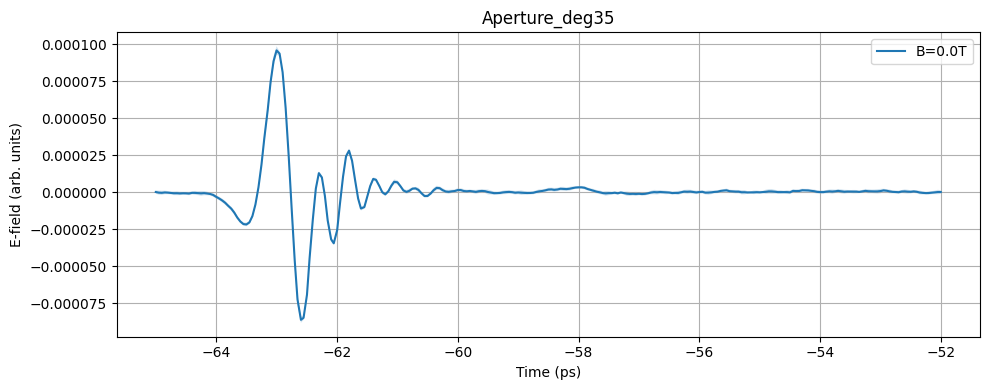

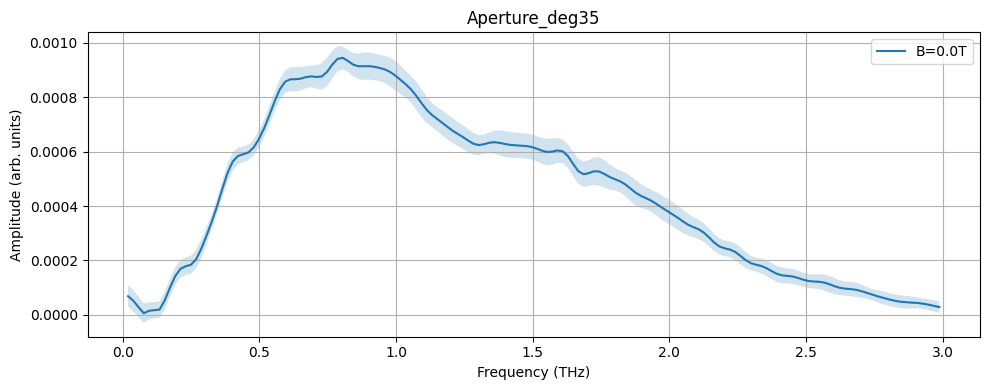

Plots saved to ./.


In [ ]:
hdu_name = 'REF1'
analyzer.plot_statistics(hdu_name=hdu_name, title='Aperture_deg35', time_range=[-65, -52], zero_padding_ratio=4, freq_range=[0, 3.])

HDU STAT_REF2 not found in InSb_project.fits.
Adding STAT_REF2 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   26                                                  NAXIS2  =                  500                                                  NAXIS3  =                    1                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_5_6'                                                            AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.432                                                  PLACE   = 'BRK_B14D'                   

<Figure size 1000x400 with 0 Axes>

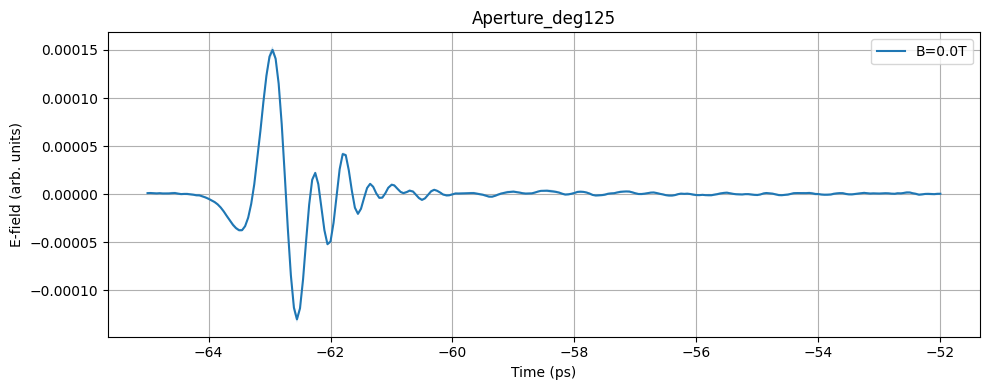

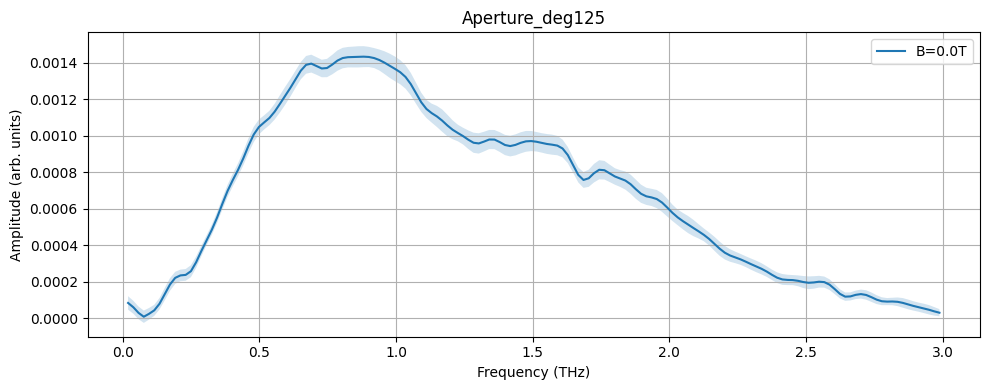

Plots saved to ./.


In [ ]:
hdu_name = 'REF2'
analyzer.plot_statistics(hdu_name=hdu_name, title='Aperture_deg125', time_range=[-65, -52], zero_padding_ratio=4, freq_range=[0, 3.])

HDU STAT_SAMPLE1 not found in InSb_project.fits.
Adding STAT_SAMPLE1 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   11                                                  NAXIS2  =                  500                                                  NAXIS3  =                    6                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_05_05'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.434                                                  PLACE   = ''                     

<Figure size 1000x400 with 0 Axes>

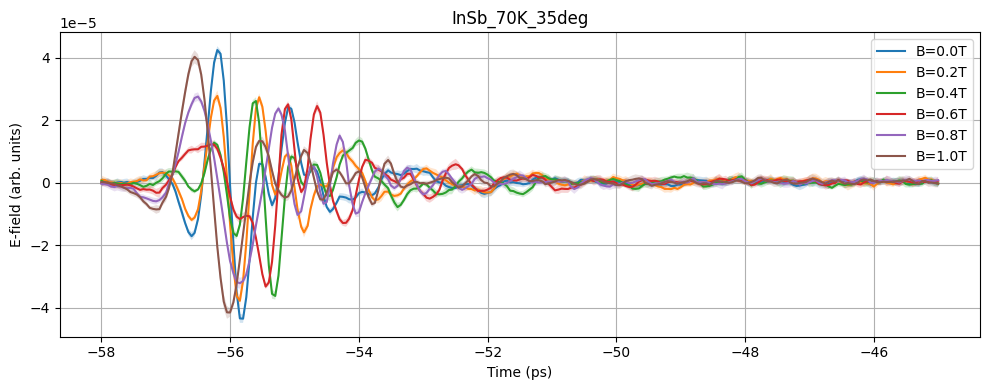

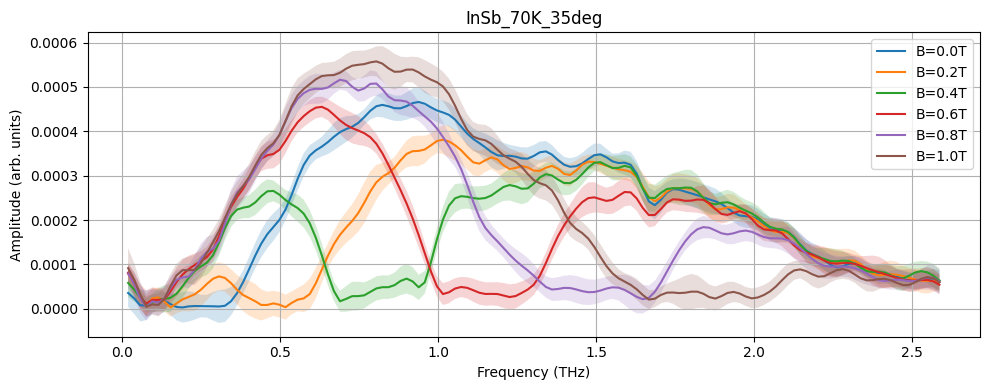

Plots saved to ./.


In [ ]:
hdu_name = 'SAMPLE1'
analyzer.plot_statistics(hdu_name=hdu_name, B_field='all', time_range=[-58, -45], freq_range = [0, 2.6], zero_padding_ratio=4, title='InSb_70K_35deg')

HDU STAT_SAMPLE2 not found in InSb_project.fits.
Adding STAT_SAMPLE2 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   11                                                  NAXIS2  =                  500                                                  NAXIS3  =                    6                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_5_6'                                                            AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.432                                                  PLACE   = 'BRK_B14D'             

<Figure size 1000x400 with 0 Axes>

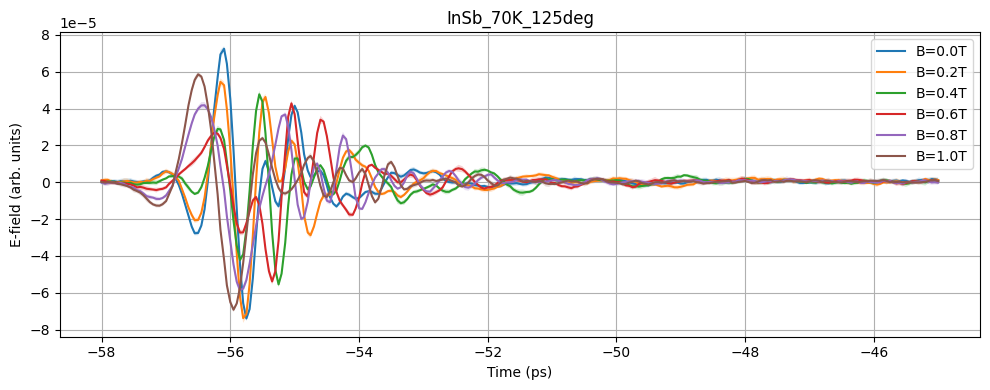

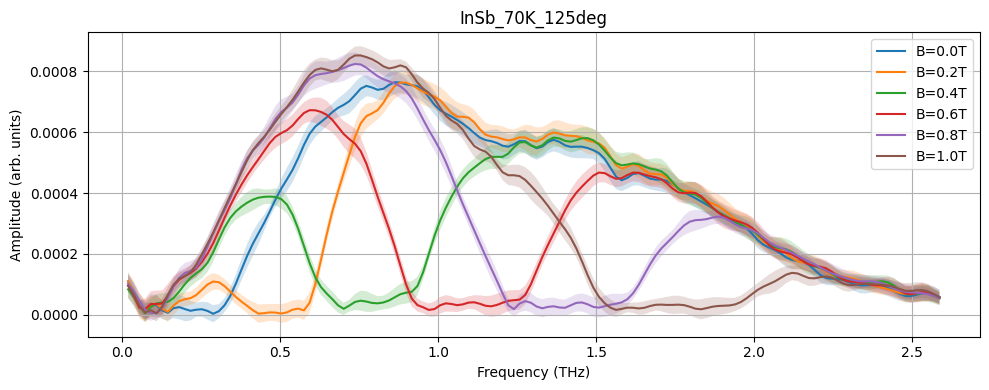

Plots saved to ./.


In [ ]:
hdu_name = 'SAMPLE2'
analyzer.plot_statistics(hdu_name=hdu_name, B_field='all', time_range=[-58, -45], freq_range = [0, 2.6], zero_padding_ratio=4, title='InSb_70K_125deg')

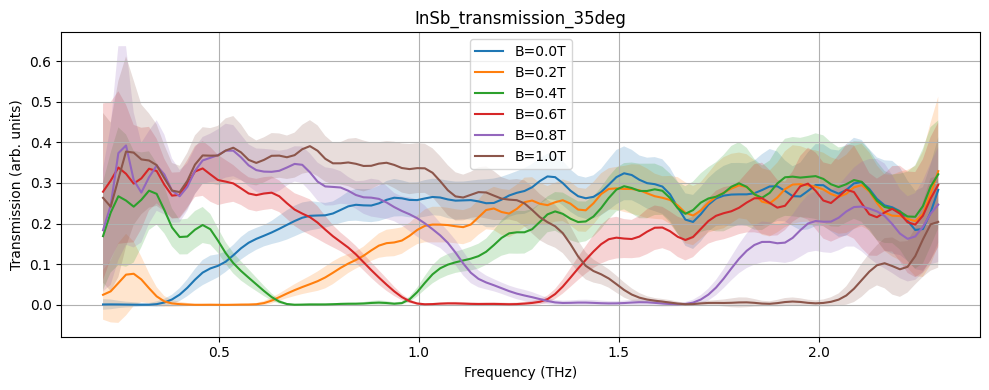

In [ ]:
hdu_tr_name = 'SAMPLE1'
hdu_ref_name = 'REF1'
analyzer.plot_transmission_spec(hdu_tr_name, hdu_ref_name, B_field='all', freq_range=[0.2, 2.3], title= 'InSb_transmission_35deg')

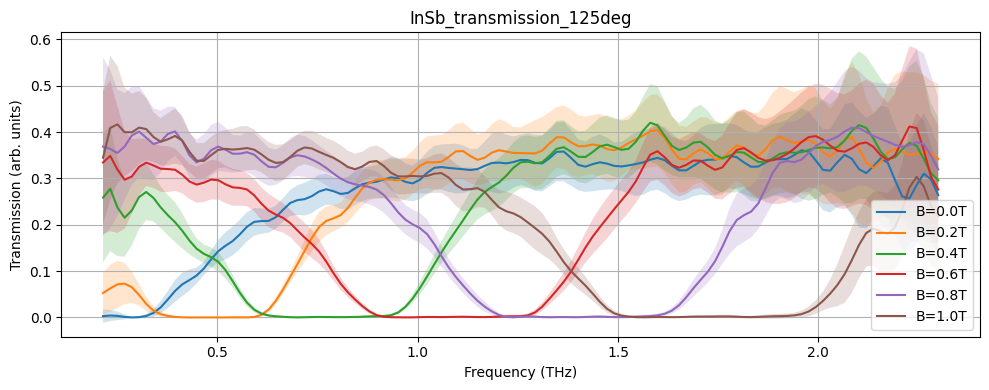

In [ ]:
hdu_tr_name = 'SAMPLE2'
hdu_ref_name = 'REF2'
analyzer.plot_transmission_spec(hdu_tr_name, hdu_ref_name, B_field='all', freq_range=[0.2, 2.3], title= 'InSb_transmission_125deg')

In [ ]:
analyzer.calculate_Ex_Ey(hdu1_name='REF1', hdu2_name='REF2', rot_angle_in_deg=10, Ex_hdu_name='REF_EX', Ey_hdu_name='REF_EY')

Adding STAT_REF_EX to the FITS file.
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                    8 / length of dimension 1                          NAXIS2  =                    7 / length of dimension 2                          PCOUNT  =                19836 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    1 / number of table fields                         DATE    = '2025_05_07'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.437                                                  PLACE   = 'BRK_B14D'                                                            GEO

In [ ]:
analyzer.calculate_Ex_Ey(hdu1_name='SAMPLE1', hdu2_name='SAMPLE2', rot_angle_in_deg=10, Ex_hdu_name='SAMPLE_EX', Ey_hdu_name='SAMPLE_EY')

Adding STAT_SAMPLE_EX to the FITS file.
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                    8 / length of dimension 1                          NAXIS2  =                    7 / length of dimension 2                          PCOUNT  =               119016 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    1 / number of table fields                         DATE    = '2025_05_05'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.434                                                  PLACE   = ''                                                                    

In [11]:
analyzer.show_info()

Filename: InSb_project.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  REF1          1 ImageHDU        21   (26, 500, 1)   float64   
  2  SAMPLE1       1 ImageHDU        26   (11, 500, 6)   float64   
  3  REF2          1 ImageHDU        21   (26, 500, 1)   float64   
  4  SAMPLE2       1 ImageHDU        26   (11, 500, 6)   float64   
  5  STAT_REF1     1 BinTableHDU     23   7R x 1C   [PE(1044)]   
  6  STAT_REF2     1 BinTableHDU     23   7R x 1C   [PE(1044)]   
  7  STAT_SAMPLE1    1 BinTableHDU     28   7R x 1C   [PE(6264)]   
  8  STAT_SAMPLE2    1 BinTableHDU     28   7R x 1C   [PE(6264)]   
  9  STAT_REF_EX    1 BinTableHDU     23   8R x 1C   [PE(1044)]   
 10  STAT_REF_EY    1 BinTableHDU     23   8R x 1C   [PE(1044)]   
 11  STAT_SAMPLE_EX    1 BinTableHDU     28   8R x 1C   [PE(6264)]   
 12  STAT_SAMPLE_EY    1 BinTableHDU     28   8R x 1C   [PE(6264)]   
Primary HDU Info:
SIMPLE  =                  

<Figure size 1000x400 with 0 Axes>

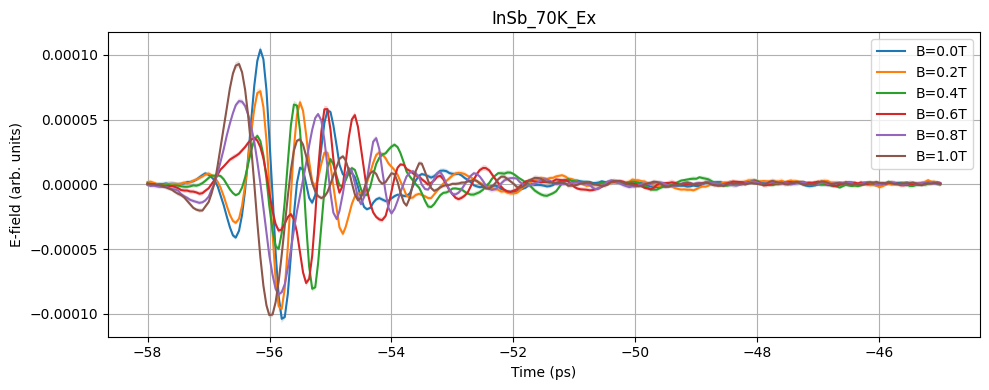

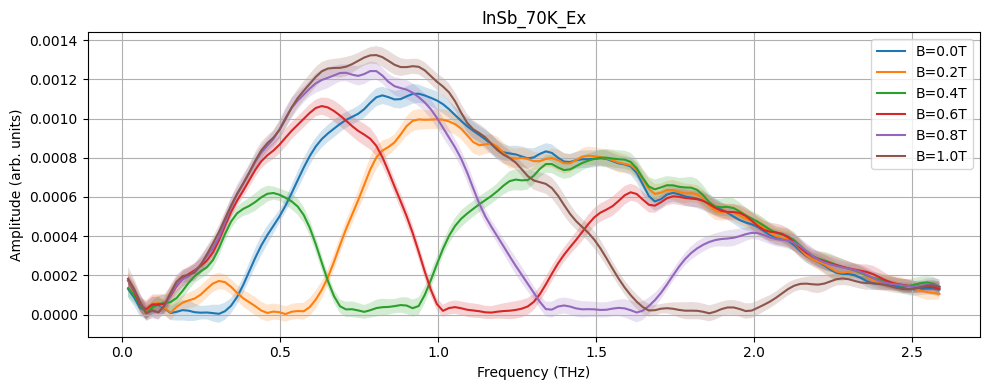

Plots saved to ./.


In [ ]:
hdu_name = 'STAT_SAMPLE_EX'
analyzer.plot_statistics(hdu_name=hdu_name, B_field='all', calculate_from_raw_data = False, time_range=[-58, -45], freq_range = [0, 2.6], zero_padding_ratio=4, title='InSb_70K_Ex')

<Figure size 1000x400 with 0 Axes>

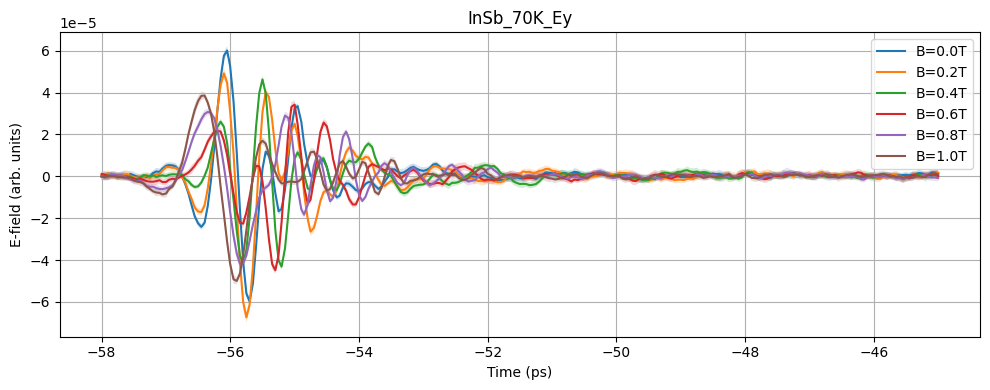

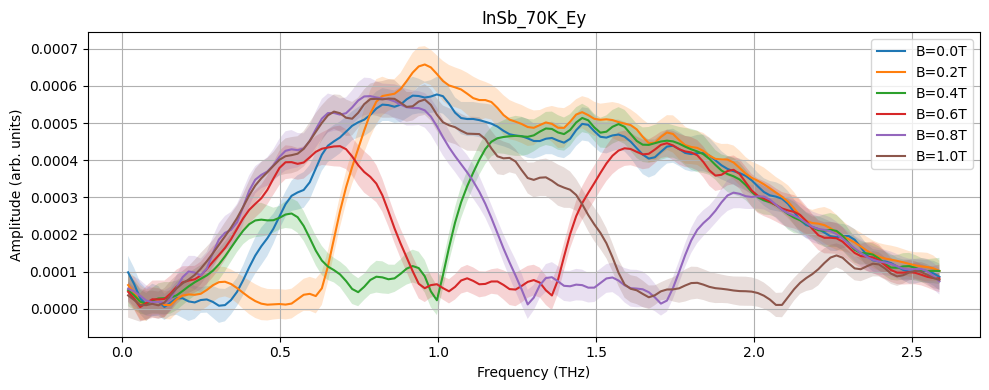

Plots saved to ./.


In [ ]:
hdu_name = 'STAT_SAMPLE_EY'
analyzer.plot_statistics(hdu_name=hdu_name, B_field='all', calculate_from_raw_data = False, time_range=[-58, -45], freq_range = [0, 2.6], zero_padding_ratio=4, title='InSb_70K_Ey')

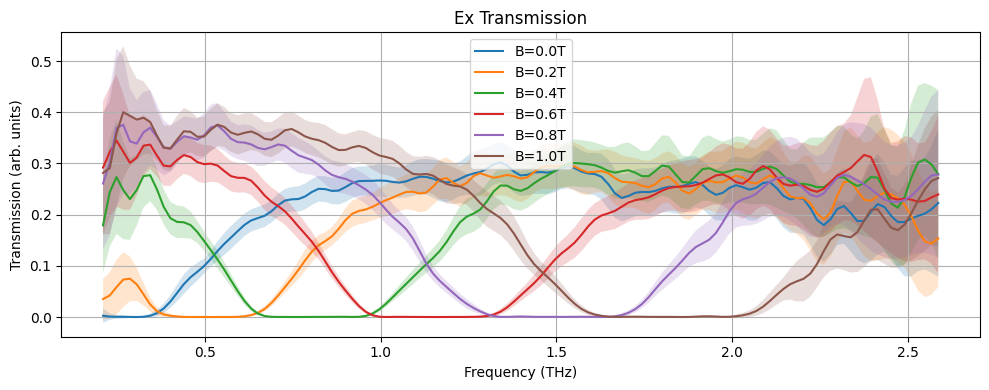

In [ ]:
analyzer.plot_transmission_spec(hdu_tr_name='STAT_SAMPLE_EX', hdu_ref_name='STAT_REF_EX', B_field='all', freq_range=[0.2, 2.6], title='Ex Transmission')

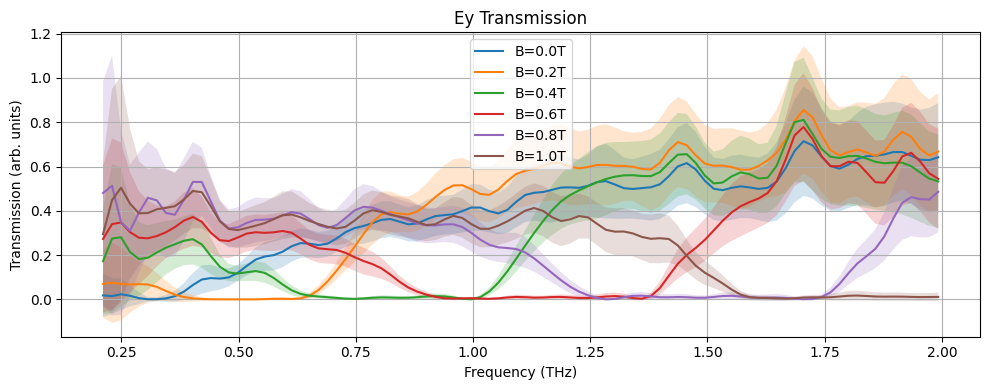

In [ ]:
analyzer.plot_transmission_spec(hdu_tr_name='STAT_SAMPLE_EY', hdu_ref_name='STAT_REF_EY', B_field='all', freq_range=[0.2, 2.], title='Ey Transmission')